In [2]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [2]:
# Getting Files Situated
data_file = "SSBM_NTSC_Fall_Speeds_Gravity_Weight.csv"
data_file_path = "datasets/{}".format(data_file)
char_attributes = pd.read_csv(data_file_path)

# Adjust the Percentage Format of "Speed Increase" to be a Float
char_attributes['Speed Increase'] = char_attributes['Speed Increase'].str.rstrip('%').astype(float)/100.0

# Average Speed ( Avg of Regular and Fast Fall Speeds )
char_attributes["Average Falling Speed"] = (char_attributes["Regular Falling Speed"] + char_attributes["Fast Falling Speed"])/2

In [3]:
char_attributes.head(5)

,Character,Regular Falling Speed,Fast Falling Speed,Gravity,Speed Increase,Weight,Air Friction,Average Falling Speed
0,Bowser,1.9,2.40,0.130,0.263,117,0.010,2.15
1,Captain Falcon,2.9,3.50,0.130,0.207,104,0.010,3.20
2,Donkey Kong,2.4,2.96,0.100,0.233,114,0.020,2.68
3,Dr. Mario,1.7,2.30,0.095,0.353,100,0.016,2.00
4,Falco,3.1,3.50,0.170,0.129,80,0.020,3.30


In [4]:
#char_attributes.iloc[:,1:6]

In [5]:
# Normalize wrt Columns via Z-Scoring

from scipy.stats import zscore
char_attributes[["Z_Regular_Falling_Speed","Z_Fast_Falling_Speed","Z_Gravity","Z_Speed_Increase","Z_Weight","Z_Average_Falling_Speed"]] = char_attributes.iloc[:,1:7].apply(zscore)

char_attributes.head()

,Character,Regular Falling Speed,Fast Falling Speed,Gravity,Speed Increase,Weight,Air Friction,Average Falling Speed,Z_Regular_Falling_Speed,Z_Fast_Falling_Speed,Z_Gravity,Z_Speed_Increase,Z_Weight,Z_Average_Falling_Speed
0,Bowser,1.9,2.40,0.130,0.263,117,0.010,2.15,-0.104299,-0.217846,0.728191,-0.301500,1.641298,-0.528828
1,Captain Falcon,2.9,3.50,0.130,0.207,104,0.010,3.20,2.065123,1.975955,0.728191,-0.728527,0.851044,-0.528828
2,Donkey Kong,2.4,2.96,0.100,0.233,114,0.020,2.68,0.980412,0.898998,-0.146985,-0.530265,1.458932,0.406514
3,Dr. Mario,1.7,2.30,0.095,0.353,100,0.016,2.00,-0.538183,-0.417282,-0.292847,0.384794,0.607888,0.032377
4,Falco,3.1,3.50,0.170,0.129,80,0.020,3.30,2.499007,1.975955,1.895093,-1.323315,-0.607888,0.406514


In [6]:
char_attributes.to_csv("SSBM_NTSC_Fall_Speeds_Gravity_Weight_With_Respective_Z_Score_Normalizations.csv")

In [7]:
# Before clustering, setup label list from the Character variable
labelList = list(char_attributes["Character"].unique())
labelList[:5]

['Bowser', 'Captain Falcon', 'Donkey Kong', 'Dr. Mario', 'Falco']

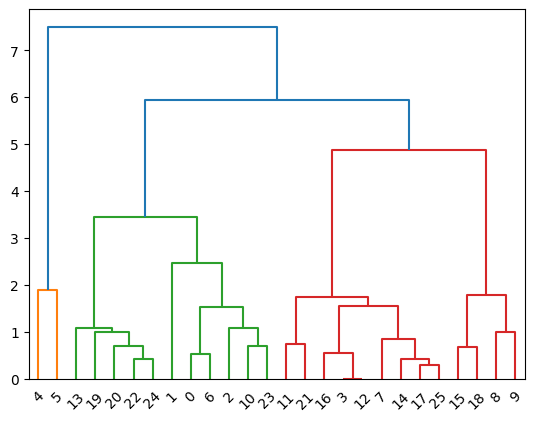

In [8]:
# Create linkage method using Ward's method
link_method = linkage(char_attributes[["Z_Regular_Falling_Speed","Z_Weight","Z_Gravity"]], method = 'ward')

# Generate & Visualize the dendrogram
dend = dendrogram(link_method
                  #,labels = labelList
                  #,truncate_mode='lastp'
                  #,p=10
                 )

In [9]:
# Method 1: criterion = 'maxclust' where a cut is defined based on the number of clusters
clusters_max = fcluster(link_method, 10, criterion='maxclust') 
#clusters_max

# Method 2: criterion='distance' where a cut is defined based on distance in the y-axis
clusters_dist = fcluster(link_method, 1, criterion='distance')
#clusters_dist

#Apply the clusters back to the dataset
char_attributes['HCluster_max'] = clusters_max
char_attributes['HCluster_dist'] = clusters_dist
# df['HCluster_dist'] = clusters_dist
char_attributes.head()

,Character,Regular Falling Speed,Fast Falling Speed,Gravity,Speed Increase,Weight,Air Friction,Average Falling Speed,Z_Regular_Falling_Speed,Z_Fast_Falling_Speed,Z_Gravity,Z_Speed_Increase,Z_Weight,Z_Average_Falling_Speed,HCluster_max,HCluster_dist
0,Bowser,1.9,2.40,0.130,0.263,117,0.010,2.15,-0.104299,-0.217846,0.728191,-0.301500,1.641298,-0.528828,4,5
1,Captain Falcon,2.9,3.50,0.130,0.207,104,0.010,3.20,2.065123,1.975955,0.728191,-0.728527,0.851044,-0.528828,5,8
2,Donkey Kong,2.4,2.96,0.100,0.233,114,0.020,2.68,0.980412,0.898998,-0.146985,-0.530265,1.458932,0.406514,4,7
3,Dr. Mario,1.7,2.30,0.095,0.353,100,0.016,2.00,-0.538183,-0.417282,-0.292847,0.384794,0.607888,0.032377,7,10
4,Falco,3.1,3.50,0.170,0.129,80,0.020,3.30,2.499007,1.975955,1.895093,-1.323315,-0.607888,0.406514,1,1


In [10]:
# Analyze Data in Terms of HClusters
# Cluster_Max
aggdata_max =char_attributes.iloc[:,1:].groupby('HCluster_dist').mean()
aggdata_max['Frequency']=char_attributes.HCluster_max.value_counts().sort_index()
aggdata_max

,Regular Falling Speed,Fast Falling Speed,Gravity,Speed Increase,Weight,Air Friction,Average Falling Speed,Z_Regular_Falling_Speed,Z_Fast_Falling_Speed,Z_Gravity,Z_Speed_Increase,Z_Weight,Z_Average_Falling_Speed,HCluster_max,Frequency
HCluster_dist,,,,,,,,,,,,,,,
1,3.100000,3.500000,0.170000,0.129000,80.00,0.020000,3.30000,2.499007,1.975955,1.895093,-1.323315,-0.607888,0.406514,1.0,1.0
2,2.800000,3.400000,0.230000,0.214000,75.00,0.020000,3.10000,1.848180,1.776519,3.645445,-0.675149,-0.911832,0.406514,2.0,1.0
3,2.140000,2.700000,0.113500,0.267500,85.00,0.015000,2.42000,0.416362,0.380463,0.246845,-0.267185,-0.303944,-0.061157,3.0,5.0
4,2.200000,2.500000,0.085000,0.136000,87.00,0.005000,2.35000,0.546527,-0.018410,-0.584573,-1.269937,-0.182366,-0.996500,3.0,5.0
5,1.950000,2.500000,0.130000,0.281500,113.00,0.015000,2.22500,0.004172,-0.018410,0.728191,-0.160429,1.398143,-0.061157,4.0,1.0
6,2.030000,2.965000,0.101500,0.463000,106.00,0.009000,2.49750,0.177726,0.908970,-0.103226,1.223597,0.972621,-0.622363,4.0,2.0
7,2.400000,2.960000,0.100000,0.233000,114.00,0.020000,2.68000,0.980412,0.898998,-0.146985,-0.530265,1.458932,0.406514,4.0,3.0
8,2.900000,3.500000,0.130000,0.207000,104.00,0.010000,3.20000,2.065123,1.975955,0.728191,-0.728527,0.851044,-0.528828,5.0,4.0
9,1.500000,2.150000,0.067500,0.446500,105.00,0.010000,1.82500,-0.972068,-0.716437,-1.095092,1.097777,0.911832,-0.528828,6.0,2.0


In [11]:
# # Analyze Data in Terms of HClusters
# # Cluster_Max
# aggdata_max =char_attributes.iloc[:,1:].groupby('HCluster_dist').mean()
# aggdata_max['Frequency']=char_attributes.HCluster_dist.value_counts().sort_index()
# aggdata_max

In [12]:
# for clst in range(1,1+len(char_attributes["HCluster_max"].unique())):
#     print(char_attributes[char_attributes["HCluster_max"]==clst][["Character"]])

for clst in range(1,1+len(char_attributes["HCluster_dist"].unique())):
    print(char_attributes[char_attributes["HCluster_dist"]==clst][["Character"]])

  Character
4     Falco
  Character
5       Fox
     Character
19     Pikachu
20         Roy
22       Sheik
24  Young Link
   Character
13     Marth
   Character
0     Bowser
6  Ganondorf
   Character
10      Link
23     Yoshi
     Character
2  Donkey Kong
        Character
1  Captain Falcon
   Character
11     Luigi
21     Samus
    Character
3   Dr. Mario
12      Mario
16       Ness
       Character
7   Ice Climbers
14        Mewtwo
17         Peach
25         Zelda
           Character
15  Mr. Game & Watch
18             Pichu
    Character
8  Jigglypuff
  Character
9     Kirby


In [15]:
# Analyze Data in Terms of HClusters
# Cluster_Max
aggdata_max =char_attributes[["Character","Weight","Gravity","Z_Weight","Z_Gravity","HCluster_dist"]].groupby('HCluster_dist').mean()
aggdata_max['Amount']=char_attributes.HCluster_max.value_counts().sort_index()
aggdata_max

/tmp/ipykernel_83043/1879918552.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Weight,Gravity,Z_Weight,Z_Gravity,Amount
HCluster_dist,,,,,
1,80.00,0.170000,-0.607888,1.895093,1.0
2,75.00,0.230000,-0.911832,3.645445,1.0
3,85.00,0.113500,-0.303944,0.246845,5.0
4,87.00,0.085000,-0.182366,-0.584573,5.0
5,113.00,0.130000,1.398143,0.728191,1.0
6,106.00,0.101500,0.972621,-0.103226,2.0
7,114.00,0.100000,1.458932,-0.146985,3.0
8,104.00,0.130000,0.851044,0.728191,4.0
9,105.00,0.067500,0.911832,-1.095092,2.0


In [16]:
char_attributes["HClusters_based_on_Dist"] = char_attributes["HCluster_dist"].apply(str)

fig = px.scatter_3d(char_attributes,
                    x='Z_Regular_Falling_Speed',
                    y='Z_Weight',
                    z='Z_Gravity',
                    color='HClusters_based_on_Dist',
                    hover_data=["Character"])
fig.show()

In [242]:
# for clst in range(1,1+len(char_attributes["HCluster_dist"].unique())):
#     print(char_attributes[char_attributes["HCluster_dist"]==clst][["Character","Regular Falling Speed","Weight"]])

In [243]:
# char_attributes

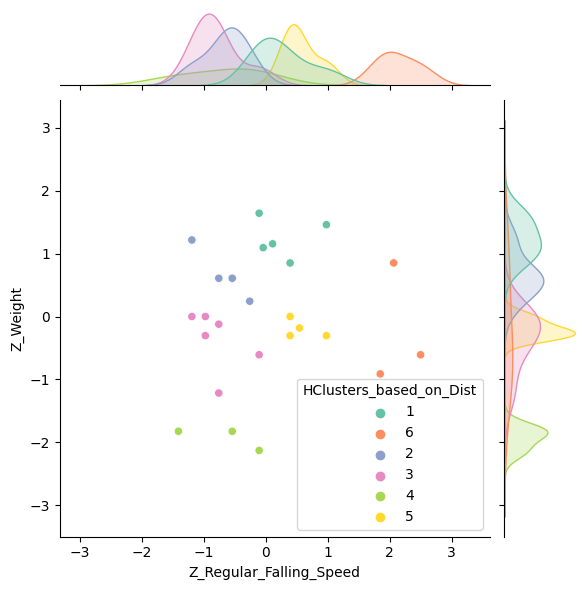

In [22]:
char_attributes["HClusters_based_on_Dist"] = char_attributes["HCluster_dist"].apply(str)

sns.jointplot(data=char_attributes,
              x="Z_Regular_Falling_Speed",
              y="Z_Weight",
              hue="HClusters_based_on_Dist",
              palette="Set2"
             )

In [245]:
new_labels = ["Bulky","Awkward_Heavies", "Samus","Slightly Light Floaties", "Kirby","Pika","Feathers","Puff", "Mids","Fast_Fallers","Falcon"]

char_attributes["HCluster"] = char_attributes["HCluster_max"]

i = 1
for label in new_labels:
    print(i,label)
    char_attributes["HCluster"] = char_attributes["HCluster"].replace(i,label)
    i+=1

1 Bulky
2 Awkward_Heavies
3 Samus
4 Slightly Light Floaties
5 Kirby
6 Pika
7 Feathers
8 Puff
9 Mids
10 Fast_Fallers
11 Falcon


In [246]:
clst = 3
char_attributes[char_attributes["HCluster_max"]==clst]

,Character,Regular Falling Speed,Fast Falling Speed,Gravity,Speed Increase,Weight,Average Falling Speed,Z_Regular_Falling_Speed,Z_Fast_Falling_Speed,Z_Gravity,Z_Speed_Increase,Z_Weight,Z_Average_Falling_Speed,HCluster_max,HCluster_dist,HClusters_based_on_Max,HCluster
9,Kirby,1.6,2.0,0.08,0.25,70,1.8,-0.755126,-1.015592,-0.730436,-0.400631,-1.215777,-0.912341,3,2,3,Samus


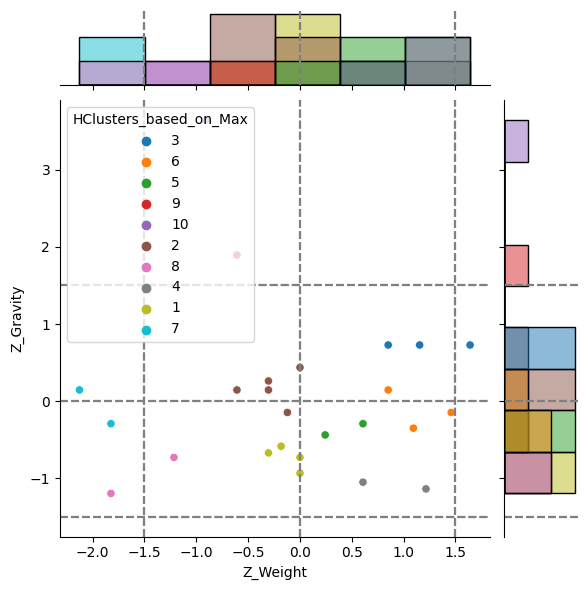

In [13]:
g = sns.JointGrid(data=char_attributes, x="Z_Weight", y="Z_Gravity", hue="HClusters_based_on_Max")
g.plot(sns.scatterplot, sns.histplot)

# Add Distribution Lines
temp_x = -1.5
g.refline(x=temp_x, y=-1.5)
g.refline(x=temp_x, y=0)
g.refline(x=temp_x, y=1.5)

temp_x = 0
g.refline(x=temp_x, y=-1.5)
g.refline(x=temp_x, y=0)
g.refline(x=temp_x, y=1.5)

temp_x = 1.5
g.refline(x=temp_x, y=-1.5)
g.refline(x=temp_x, y=0)
g.refline(x=temp_x, y=1.5)

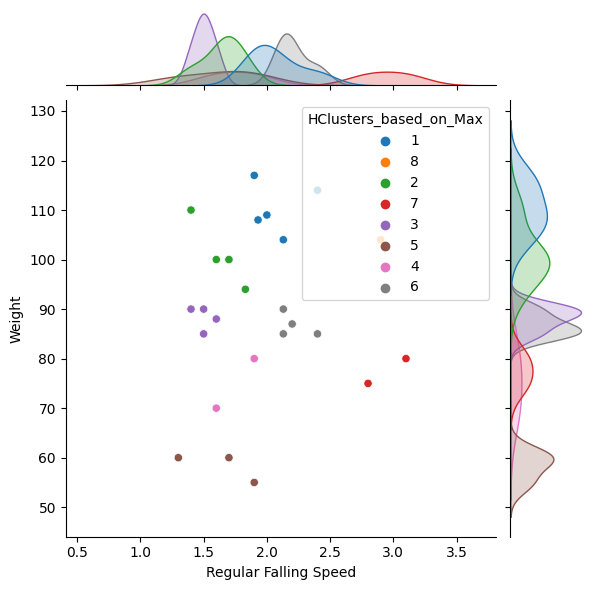

In [42]:
char_attributes["HClusters_based_on_Max"] = char_attributes["HCluster_max"].apply(str)

sns.jointplot(data=char_attributes, x="Regular Falling Speed", y="Weight", hue="HClusters_based_on_Max");

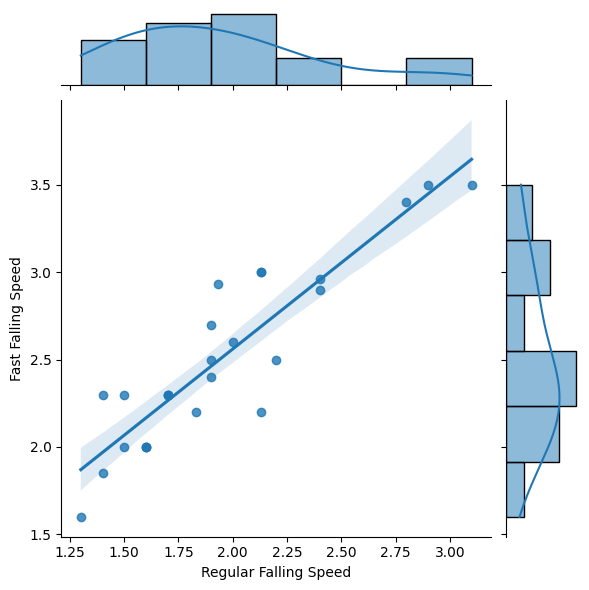

In [13]:
sns.jointplot(data=char_attributes, x="Regular Falling Speed", y="Fast Falling Speed", kind="reg");

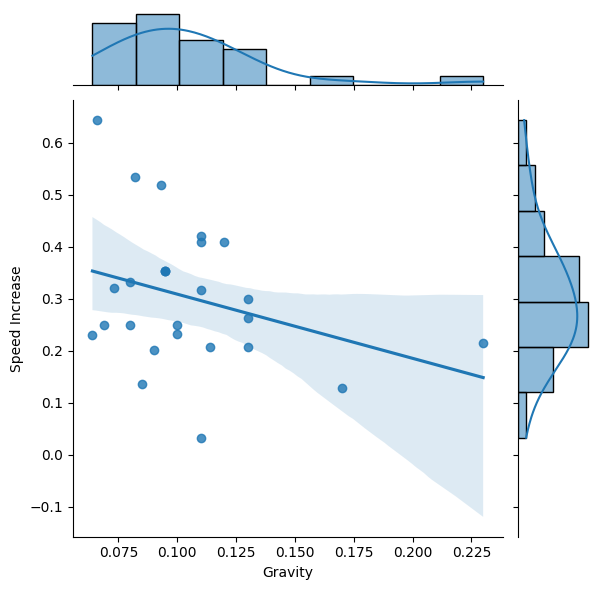

In [194]:
sns.jointplot(data=char_attributes, x="Gravity", y="Speed Increase", kind="reg");

In [15]:
char_attributes.iloc[:,1:7]

,Regular Falling Speed,Fast Falling Speed,Gravity,Speed Increase,Weight,HCluster_max
0,1.90,2.40,0.130,0.263,117,1
1,2.90,3.50,0.130,0.207,104,1
2,2.40,2.96,0.100,0.233,114,1
3,1.70,2.30,0.095,0.353,100,1
4,3.10,3.50,0.170,0.129,80,2
5,2.80,3.40,0.230,0.214,75,3
6,2.00,2.60,0.130,0.300,109,1
7,1.60,2.00,0.100,0.250,88,2
8,1.30,1.60,0.064,0.231,60,3
9,1.60,2.00,0.080,0.250,70,3


In [198]:
char_attributes[["Character","Regular Falling Speed","Fast Falling Speed"]]

,Character,Regular Falling Speed,Fast Falling Speed
0,Bowser,1.90,2.40
1,Captain Falcon,2.90,3.50
2,Donkey Kong,2.40,2.96
3,Dr. Mario,1.70,2.30
4,Falco,3.10,3.50
5,Fox,2.80,3.40
6,Ganondorf,2.00,2.60
7,Ice Climbers,1.60,2.00
8,Jigglypuff,1.30,1.60
9,Kirby,1.60,2.00


In [215]:
char_attributes

,Character,Regular Falling Speed,Fast Falling Speed,Gravity,Speed Increase,Weight,Z_Regular_Falling_Speed,Z_Fast_Falling_Speed,Z_Gravity,Z_Speed_Increase,Z_Weight,HCluster_max,HCluster_dist,HClusters_based_on_Max,HCluster,Average Falling Speed
0,Bowser,1.90,2.40,0.130,0.263,117,-0.104299,-0.217846,0.728191,-0.301500,1.641298,1,1,Bulky,Bulky,2.150
1,Captain Falcon,2.90,3.50,0.130,0.207,104,2.065123,1.975955,0.728191,-0.728527,0.851044,12,8,12,12,3.200
2,Donkey Kong,2.40,2.96,0.100,0.233,114,0.980412,0.898998,-0.146985,-0.530265,1.458932,2,1,Awkward_Heavies,Awkward_Heavies,2.680
3,Dr. Mario,1.70,2.30,0.095,0.353,100,-0.538183,-0.417282,-0.292847,0.384794,0.607888,3,2,Awkward_Floaties,Awkward_Floaties,2.000
4,Falco,3.10,3.50,0.170,0.129,80,2.499007,1.975955,1.895093,-1.323315,-0.607888,11,7,11,11,3.300
5,Fox,2.80,3.40,0.230,0.214,75,1.848180,1.776519,3.645445,-0.675149,-0.911832,11,7,11,11,3.100
6,Ganondorf,2.00,2.60,0.130,0.300,109,0.112643,0.181027,0.728191,-0.019357,1.154988,1,1,Bulky,Bulky,2.300
7,Ice Climbers,1.60,2.00,0.100,0.250,88,-0.755126,-1.015592,-0.146985,-0.400631,-0.121578,5,3,Mids,Mids,1.800
8,Jigglypuff,1.30,1.60,0.064,0.231,60,-1.405952,-1.813338,-1.197196,-0.545516,-1.823665,9,5,9,9,1.450
9,Kirby,1.60,2.00,0.080,0.250,70,-0.755126,-1.015592,-0.730436,-0.400631,-1.215777,6,4,Fast_Fallers,Fast_Fallers,1.800
